In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/windows-store/msft.csv


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from datetime import datetime

In [3]:
df = pd.read_csv("../input/windows-store/msft.csv")

In [4]:
Total_null = df.isnull().sum()
df.dropna(inplace=True)

Text(0.5, 1.0, 'Distribution of Rating')

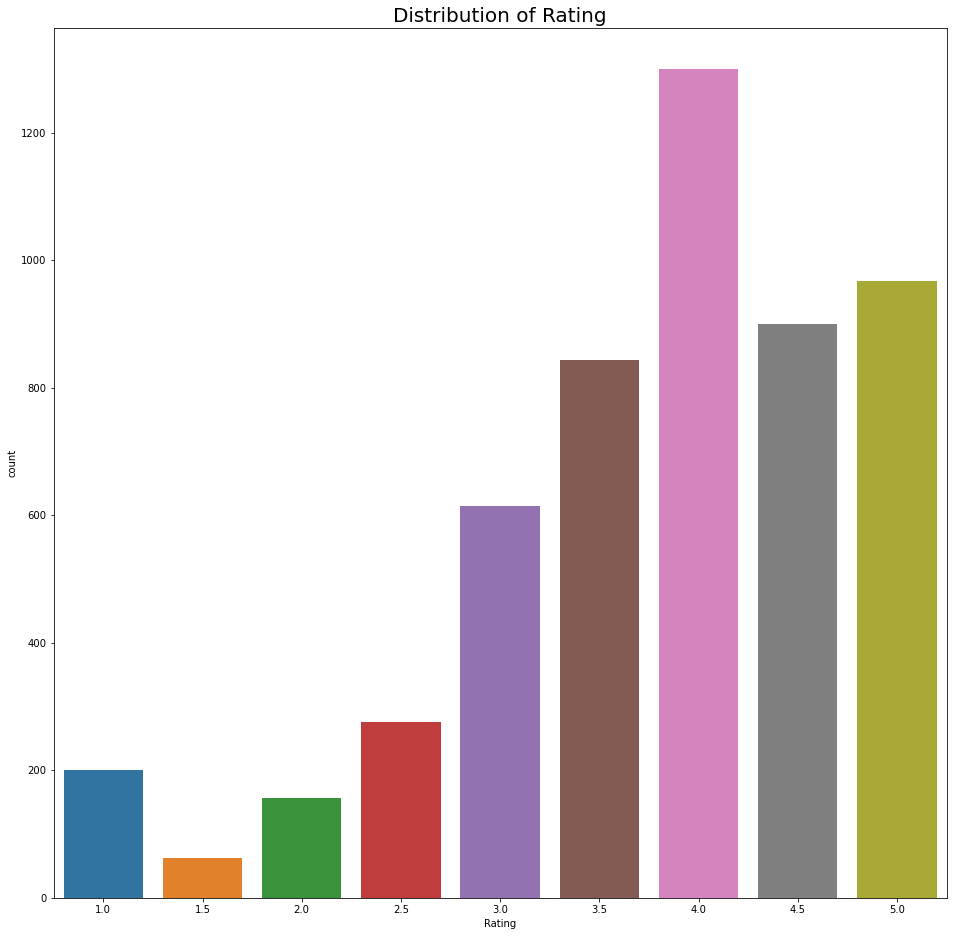

In [5]:
plt.figure(figsize=(16,16))
sns.countplot(df.Rating)
plt.title("Distribution of Rating",fontsize=20)

In [6]:
def price(x):
    chr = x.replace("₹","")
    if "Free" in chr:
        chr = chr.replace("Free","0")
    elif "," in chr:
        chr = chr.replace(",","")
    return chr

In [7]:
df.Price = df.Price.apply(lambda x : price(x))
df.Price = df.Price.astype("float")

In [8]:
def broad_price(x):
    if x>0:
        return "Paid"
    else:
        return "Free"
df["Broad_price"] = df.Price.apply(lambda x : broad_price(x))

In [9]:
Paid_Free_Percentage = df.Broad_price.value_counts().to_frame(name="Count")
Paid_Free_Percentage["Percentage"] = Paid_Free_Percentage / Paid_Free_Percentage.Count.sum() * 100

Text(0.5, 1.0, 'Percentage of Free&Paid Software')

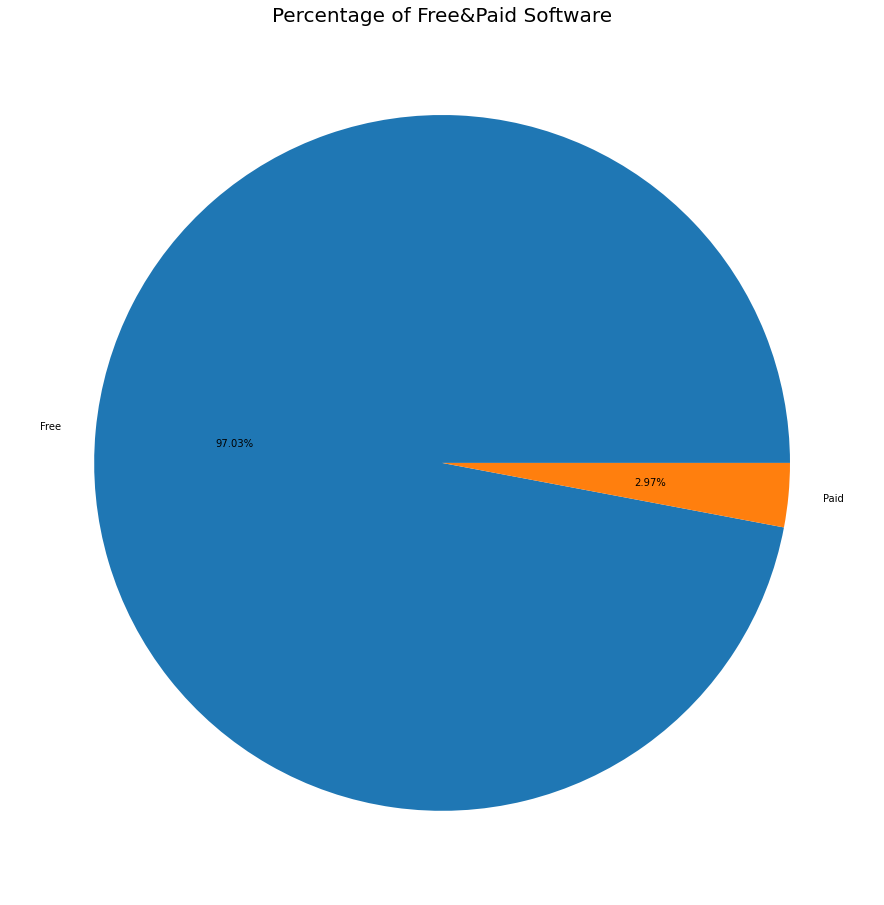

In [10]:
plt.figure(figsize=(16,16))
plt.pie(Paid_Free_Percentage.Percentage,labels=Paid_Free_Percentage.index.to_list(),autopct="%.2f%%")
plt.title("Percentage of Free&Paid Software",fontsize=20)

Text(0.5, 1.0, 'Distribution of Price')

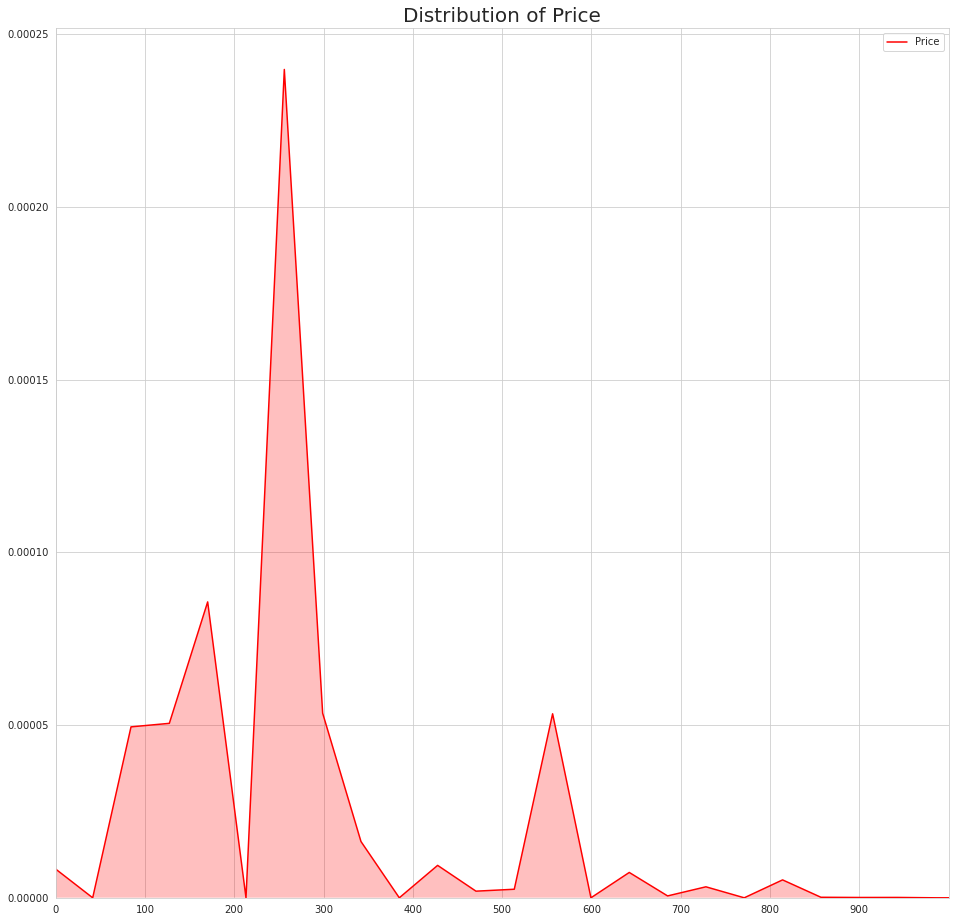

In [11]:
sns.set_style("whitegrid")
plt.figure(figsize=(16,16))
sns.kdeplot(df.Price,bw=0.5,shade=True,color="r")
plt.xlim(0,1000)
plt.xticks(np.arange(0,1000,step=100))
plt.title("Distribution of Price",fontsize=20)

In [12]:
Genre = df.Category.value_counts().to_frame(name="Count")
Genre["Percentage"] = Genre.Count / Genre.Count.sum() * 100

Text(0.5, 1.0, 'Percentage of Category')

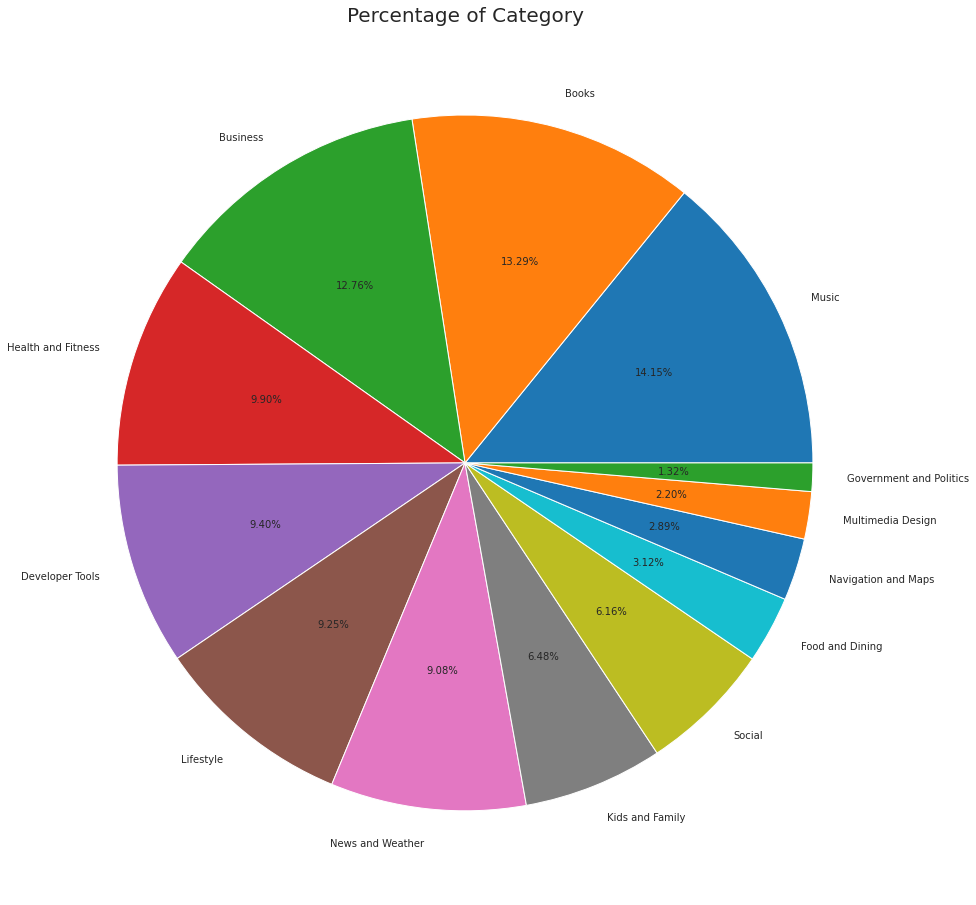

In [13]:
plt.figure(figsize=(16,16))
plt.pie(Genre.Percentage,labels=Genre.index.to_list(),autopct="%.2f%%")
plt.title("Percentage of Category",fontsize=20)

In [14]:
df["date_dt"] = pd.to_datetime(df.Date)
df["Year"] = df.date_dt.dt.year

In [15]:
def quarter(x):
    if 1<=x<=3:
        return 1
    elif 4<=x<=6:
        return 2
    elif 7<=x<=9:
        return 3
    else:
        return 4
df["Quarter"] = df.date_dt.dt.month.apply(lambda x : quarter(x))

Text(0.5, 1.0, 'Software released by Quarter')

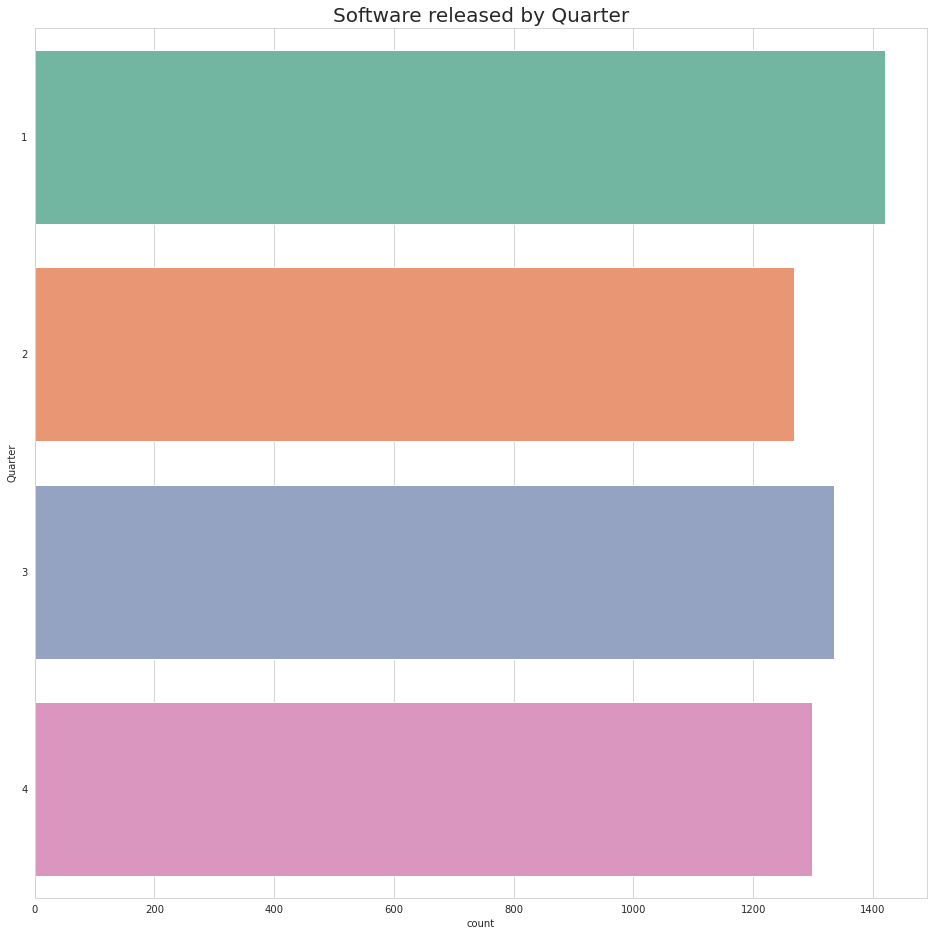

In [16]:
plt.figure(figsize=(16,16))
sns.countplot(y=df.Quarter,orient="v",palette="Set2")
plt.title("Software released by Quarter",fontsize=20)

In [17]:
Rating_by_Price = df.groupby("Broad_price")["Rating"].mean()
print(Rating_by_Price)

Broad_price
Free    3.832946
Paid    2.477848
Name: Rating, dtype: float64


Text(0.5, 1.0, 'Distribution of Rating by Price')

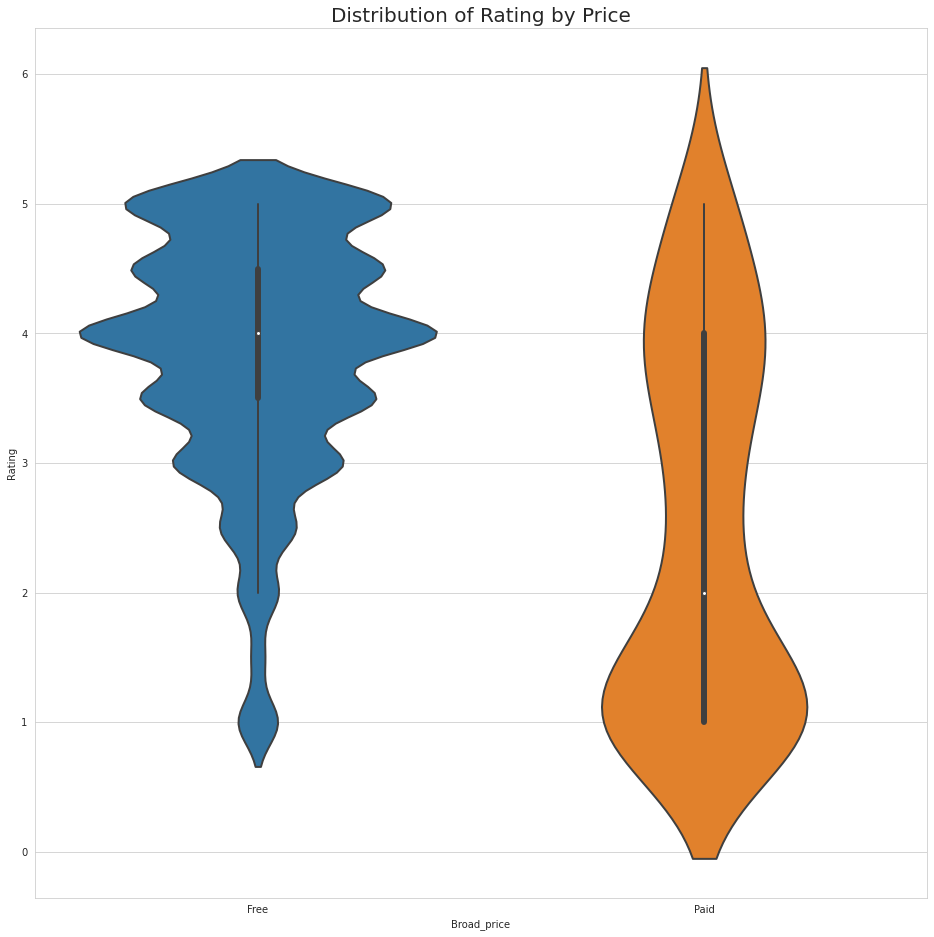

In [18]:
plt.figure(figsize=(16,16))
sns.violinplot(x="Broad_price",y="Rating",data=df,linewidth=2)
plt.title("Distribution of Rating by Price",fontsize=20)

In [41]:
df.groupby("Category")["Price"].mean().sort_values(ascending=False)

Category
Developer Tools            45.772000
Business                   27.763181
Books                      23.845827
Social                      0.000000
News and Weather            0.000000
Navigation and Maps         0.000000
Music                       0.000000
Multimedia Design           0.000000
Lifestyle                   0.000000
Kids and Family             0.000000
Health and Fitness          0.000000
Government and Politics     0.000000
Food and Dining             0.000000
Name: Price, dtype: float64

In [43]:
df.groupby("Category")["Rating"].mean().sort_values(ascending=False)

Category
Government and Politics    4.050000
Kids and Family            3.947826
Developer Tools            3.886000
Lifestyle                  3.850610
Social                     3.847561
News and Weather           3.837474
Navigation and Maps        3.801948
Books                      3.791372
Food and Dining            3.789157
Health and Fitness         3.785579
Music                      3.759628
Business                   3.602356
Multimedia Design          3.551282
Name: Rating, dtype: float64